- In thie notebook, I tried to look into actual data for options on S&P index
- Mostly I wanted to plot and see volatility smile on real data
- Although, smile can be seen below but some more data cleaning is required for the smooth curve

In [12]:
import pandas as pd
import numpy as np
import opstrat as op # for plotting
from optionprice import option
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

In [3]:
ticker = "^SPX"
tk = yf.Ticker(ticker)
exps = tk.options # it will give expiration dates for all options 

In [4]:
def get_options(expiry_date):
    """Retrieve all options for an expiry date, using tk class directly"""
    opt = tk.option_chain(expiry_date)
    df_temp = pd.concat([opt.calls, opt.puts])
    df_temp['expiration_date'] = expiry_date
    return df_temp

In [5]:
ls_dfs = list(map(get_options, exps))
opt_df = pd.concat(ls_dfs)

In [88]:
opt_df.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expiration_date,Moneyness,call_or_put
0,SPXW230103C01000000,2022-12-29 15:22:19,1000.0,2841.88,2842.2,2846.7,0.0,0.0,18.0,97.0,6.625490,1.0,REGULAR,USD,2023-01-03,0.260451,C
1,SPXW230103C01200000,2022-12-21 01:36:02,1200.0,2644.80,2642.3,2646.7,0.0,0.0,4.0,24.0,5.770755,1.0,REGULAR,USD,2023-01-03,0.312541,C
2,SPXW230103C01600000,2022-12-14 17:36:00,1600.0,2439.59,2242.6,2246.8,0.0,0.0,NaN,3.0,4.445317,1.0,REGULAR,USD,2023-01-03,0.416721,C
3,SPXW230103C01800000,2022-12-19 07:29:52,1800.0,2059.90,2042.7,2046.9,0.0,0.0,NaN,5.0,3.902588,1.0,REGULAR,USD,2023-01-03,0.468811,C
4,SPXW230103C02000000,2022-12-29 15:22:19,2000.0,1842.48,1843.0,1847.0,0.0,0.0,17.0,18.0,3.424318,1.0,REGULAR,USD,2023-01-03,0.520901,C


In [7]:
current_spx_level = tk.history()['Close'][0]

In [65]:
opt_df['Moneyness'] = opt_df['strike'] / current_spx_level
# further break it up
opt_df['call_or_put'] = opt_df['contractSymbol'].apply(lambda x:"C" if "C" in x else "P")

In [84]:
# fixing 1 expiry date
exp = exps[4]
df_temp = opt_df[opt_df['expiration_date'] == exp]

In [85]:
df_call = df_temp[df_temp['call_or_put'] == "C"]
df_put = df_temp[df_temp['call_or_put'] == "P"]

<AxesSubplot:xlabel='Moneyness'>

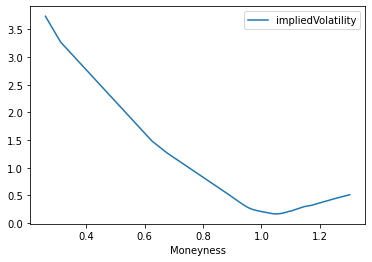

In [86]:
df_call.plot(x = 'Moneyness', y= 'impliedVolatility')

<AxesSubplot:xlabel='Moneyness'>

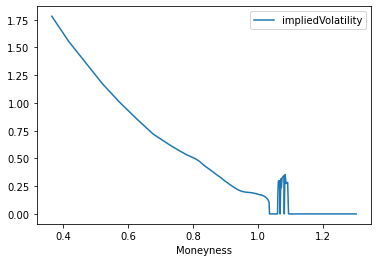

In [87]:
df_put.plot(x = 'Moneyness', y= 'impliedVolatility')

- As expected, OTM and ITM have mostly higher implied vols as compare to ATM mostly due to increased risk of potenital large movments.
- OTM puts have higher implied vol as their value can be attributed purely to future expectation and risk averse nature of investors
- People generally write more upside calls to protect their large long positions of underlying, sometime this scenario might lead to lower implied vol to the right of ATM for IV Call
- Because of put call parity, implied vol generated at any money ness from call and put should be same, but this occur less frequently in the markets